In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question** Importer le fichier `heart_Disease.csv` dans un `dataframe`. Regarder les premières lignes, regardez les statistiques descriptives.

In [4]:
df = pd.read_csv('heart_Disease.csv')

# Observation

**Question** Regardez l'aide sur `nunique` de pandas et afficher des informations complémentaires sur ce dataset. Les valeurs numériques sont elles toutes des valeurs continues ou des valeurs discrètes ? 

In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Les attributs ici qui ont un nombre de valeurs supérieur à 5 sont plutôt à interpréter comme des attributs à valeurs continues et les autres des attributs catégoriels à valeurs discrètes. 

In [8]:
attrs_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
attrs_cat = list(set(df.columns).difference(set(attrs_cont)))
attrs_cat.remove('target')
attrs_cat

['sex', 'fbs', 'ca', 'restecg', 'thal', 'exang', 'slope', 'cp']

**Question** Une `DataFrame` est une collection de `Series` qui sont les colonnes. On peut aussi regarder les différentes valeurs que peuvent prendre les colonnes avec `value_counts`. Regardez les différentes valeurs de chaque colonne et en particulier de la `target`.

In [10]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
77   1    0   125       304   0    0        162      1      0.0      2      3   2     0         1
51   0    2   130       256   0    0        149      0      0.5      2      0   2     1         1
              140       308   0    0        142      0      1.5      2      1   2     1         1
     1    0   140       261   0    0        186      1      0.0      2      0   2     1         1
                                                                                               ..
59   1    0   138       271   0    0        182      0      0.0      2      0   2     1         1
              140       177   0    1        162      1      0.0      2      1   3     0         1
              164       176   1    0        90       0      1.0      1      2   1     0         1
              170       3

**Question** Tracer des histogrammes représentant ces comptages. Vous pouvez directement utiliser la méthode `hist` des `DataFrames` ou des `Series`.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

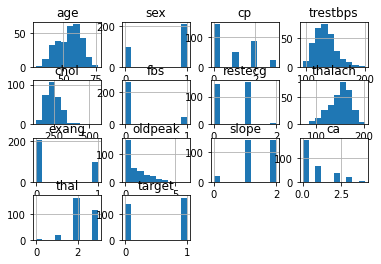

In [12]:
df.hist()

# Petit rappel de Pandas

In [14]:
df['age'].head()  # sélection d'une colonne

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [16]:
df[['age', 'sex']].head() # sélection de colonnes

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [18]:
df.iloc[:,0:2].head() # sélection lignes et de colonnes par les indices

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [20]:
df['sex']==0  # filtre, série de booléens

0      False
1      False
2       True
3      False
4       True
       ...  
298     True
299    False
300    False
301    False
302     True
Name: sex, Length: 303, dtype: bool

In [22]:
df[df['sex']==0] # application d'un filtre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [24]:
df[df['sex']==0][['age','slope']]  # cumuler un filtre et une sélection

,age,slope
2,41,2
4,57,2
6,56,1
11,48,2
14,58,2
...,...,...
289,55,1
292,58,1
296,63,1
298,57,1


# Préparation

**Question** Préparer l'échantillon pour permettre une évaluation de l'erreur.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test = train_test_split(df.iloc[:,0:-1], random_state=42, train_size=2/3, test_size=1/3) # toutes les colonnes sauf 'target'
y_train, y_test = train_test_split(df['target']   , random_state=42, train_size=2/3, test_size=1/3) # uniquement la colonne 'target'

# Classe majoritaire

**Question** Dans un problème de classification, il faut toujours évaluer les performances d'un classifieur par rapport à quelque chose de très bête qui est la fonction constante qui prédit la classe la plus fréquente. D'après les statistiques quel serait la performance d'une telle règle sur l'échantillon complet?

***Ma réponse*** : Cette règle assure que le classifieur reconnaisse bien l'appartenance des données les plus courantes à la classe majoritaire. Cela constitue le premier pas vers la classification des données plus subtiles.

**Question** On peut trouver d'autres classeurs très bêtes comme celui-ci dans le package `dummy` de sklearn. Faites un tel classifieur qui prédit la classe majoritaire avec une des instances d'un des modules de ce package.

In [28]:
from sklearn.dummy import DummyClassifier

In [29]:
dc = DummyClassifier(strategy='most_frequent')

In [30]:
dc.fit(X_train, y_train)
dc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Naive Bayes

**Question** Lire l'explication introductive de Naive Bayes dans la [documentation de sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). On refait ci-dessous quelques calculs presque à la main, de façon pas très maligne, juste pour décomposer et comprendre...

**Question** Prenons les attributs `sex` et `fbs`. Calculons le nombre de fois où `sex` vaut 1 et 0 quand la cible `target` vaut 1.

In [31]:
df[df['target']==1][df['sex']==0]['sex'].count(), df[df['target']==1][df['sex']==1]['sex'].count() # Pour sex == 0 puis sex == 1

(72, 93)

**Question** Calculer les probabilités  P(sex=1|target=1), P(sex=0|target=1) nommés p1s1 et p1s0

In [32]:
p1s0 = df[df['target']==1][df['sex']==0]['sex'].count() / len(df.index)
p1s1 = df[df['target']==1][df['sex']==1]['sex'].count() / len(df.index)
p1s0, p1s1

(0.2376237623762376, 0.3069306930693069)

**Question** Prenons les attributs `sex` et `fbs`. Calculons les probabilités suivantes sur l'échantillon de train.
- P(sex|target), c'est-à-dire les 4 valeurs P(sex=1|target=1), P(sex=0|target=1), P(sex=1|target=0), P(sex=0|target=0). Nommés p1s1, p1s0, p0s1, p0s0 
- P(fbs|target) (4 valeurs). Nommés p1f1, p1f0, p0f1, p0f0 

In [33]:
p1s0 = X_train[y_train==1][X_train['sex']==0]['sex'].count() / len(X_train.index)
p1s1 = X_train[y_train==1][X_train['sex']==1]['sex'].count() / len(X_train.index)
p1s0, p1s1

(0.2524752475247525, 0.2722772277227723)

In [34]:
p0s0 = X_train[y_train==0][X_train['sex']==0]['sex'].count() / len(X_train.index)
p0s1 = X_train[y_train==0][X_train['sex']==1]['sex'].count() / len(X_train.index)
p0s0, p0s1 # p0s0 + p0s1 + p1s0 + p1s1 vaut 1

(0.0891089108910891, 0.38613861386138615)

In [35]:
p1f0 = X_train[y_train==1][X_train['fbs']==0]['fbs'].count() / len(X_train.index)
p1f1 = X_train[y_train==1][X_train['fbs']==1]['fbs'].count() / len(X_train.index)
p1f0, p1f1

(0.4504950495049505, 0.07425742574257425)

In [36]:
p0f0 = X_train[y_train==0][X_train['fbs']==0]['fbs'].count() / len(X_train.index)
p0f1 = X_train[y_train==0][X_train['fbs']==1]['fbs'].count() / len(X_train.index)
p0f0, p0f1 # p0f0 + p0f1 + p1f0 + p1f1 vaut 1

(0.4207920792079208, 0.054455445544554455)

**Question** Toujours sur le train, quelles sont les probabilités d'avoir la cible à 1 ou à 0 ? p1, p0

In [37]:
p0 = y_train[y_train==0].count() / len(y_train.index)
p1 = y_train[y_train==1].count() / len(y_train.index)
p0, p1 # p0 + p1 vaut 1

(0.4752475247524752, 0.5247524752475248)

**Question** Maintenant prenons le premier exemple du test et regardons les attributs `sex` et `fbs`. Avec le modèle de Naive Bayes, quelle serait la valeur de la cible qui serait prédite et pourquoi ? 

In [38]:
X_test.iloc[0,:][['sex', 'fbs']]

sex    1.0
fbs    0.0
Name: 179, dtype: float64

***Ma réponse :*** La valeur 0 a plus de chance d'être prédite car pour sex == 1, p0s1 > p1s1 et pour fbs == 0, p0f0 est presque équivalent à p1f0

*Réponse* : C'est donc 0 la valeur prédite.

**Question** Importez `CategoricalNB` et appliquez le classifeur en ne prenant en compte que les attributs `sex` et `fbs` pour retrouver ces résultats.

In [39]:
from sklearn.naive_bayes import CategoricalNB

In [40]:
cnb = CategoricalNB().fit(X_train[['sex', 'fbs']], y_train)
cnb.predict(X_test[['sex', 'fbs']])

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

**Question** Appliquez le classifeur sur les attributs catégoriels et estimer le score.

In [41]:
attributs_categoriels = X_train.columns[X_train.nunique()<=5]
attributs_categoriels

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [42]:
cnb = CategoricalNB().fit(X_train[attributs_categoriels], y_train)
cnb.score(X_train[attributs_categoriels], y_train)
# cnb.score(X_test[attributs_categoriels], y_test) # me retourne "index 4 is out of bounds for axis 1 with size 4"

0.8762376237623762

# Arbres de décision

**Question** Utilisez la classe `DecisionTreeClassifier` du package `tree` pour créer un arbre de décision. Quel est le score obtenu ?

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier().fit(X_train[attributs_categoriels], y_train)
dtc.score(X_test[attributs_categoriels], y_test)
# [74-81]%

0.7722772277227723

**Question** Afficher cet arbre, sous forme de texte et sous forme de dessin.

[Text(179.75571428571428, 207.55636363636364, 'X[6] <= 0.5\ngini = 0.499\nsamples = 202\nvalue = [96, 106]'),
 Text(119.57142857142857, 187.7890909090909, 'X[7] <= 2.5\ngini = 0.389\nsamples = 121\nvalue = [32, 89]'),
 Text(82.90285714285714, 168.0218181818182, 'X[4] <= 0.5\ngini = 0.191\nsamples = 84\nvalue = [9, 75]'),
 Text(51.01714285714286, 148.25454545454545, 'X[3] <= 0.5\ngini = 0.108\nsamples = 70\nvalue = [4, 66]'),
 Text(31.885714285714286, 128.48727272727274, 'X[5] <= 1.5\ngini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(12.754285714285714, 108.72, 'X[0] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(6.377142857142857, 88.95272727272729, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(19.13142857142857, 88.95272727272729, 'X[2] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(12.754285714285714, 69.18545454545455, 'X[7] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(6.377142857142857, 49.418181818181836, 'gini = 0.0\nsamples = 1\nvalue 

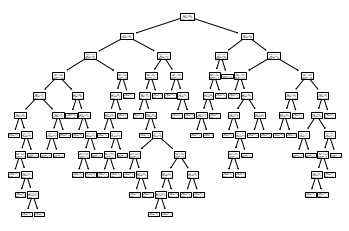

In [45]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [46]:
from sklearn.tree import export_text
print(export_text(dtc, feature_names=X_test.columns[X_train.nunique()<=5].tolist()))

|--- ca <= 0.50
|   |--- thal <= 2.50
|   |   |--- exang <= 0.50
|   |   |   |--- restecg <= 0.50
|   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- fbs <= 0.50
|   |   |   |   |   |   |   |--- thal <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- thal >  1.50
|   |   |   |   |   |   |   |   |--- cp <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- cp >  0.50
|   |   |   |   |   |   |   |   |   |--- cp <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- cp >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fbs >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- slope >  1.50
|   |   |   |   |   |--- cp <= 0.50
|   |   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |  

**Question** Faites une recherche du meilleur arbre de décision en jouant sur les hyperparamètres `max_depth` entre 2 et 10 et `criterion` qui peut être `"gini"` ou  `"entropy"`

In [47]:
gini_dtc = DecisionTreeClassifier(criterion='gini', max_depth=2).fit(X_train[attributs_categoriels], y_train)
entr_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train[attributs_categoriels], y_train)
gini_dtc.score(X_test[attributs_categoriels], y_test), entr_dtc.score(X_test[attributs_categoriels], y_test)
# 69% de précision qu'importe la fonction de mesure, le bottleneck est donc la profondeur

(0.693069306930693, 0.693069306930693)

In [48]:
gini_dtc = DecisionTreeClassifier(criterion='gini', max_depth=5).fit(X_train[attributs_categoriels], y_train)
entr_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X_train[attributs_categoriels], y_train)
gini_dtc.score(X_test[attributs_categoriels], y_test), entr_dtc.score(X_test[attributs_categoriels], y_test)
# 73% de précision qu'importe la fonction de mesure, le bottleneck est donc toujours la profondeur

(0.7326732673267327, 0.7326732673267327)

In [49]:
gini_dtc = DecisionTreeClassifier(criterion='gini', max_depth=10).fit(X_train[attributs_categoriels], y_train)
entr_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X_train[attributs_categoriels], y_train)
gini_dtc.score(X_test[attributs_categoriels], y_test), entr_dtc.score(X_test[attributs_categoriels], y_test)
# [75-81]% de précision qu'importe la fonction de mesure, juste pour donner un aperçu de la dégradation

(0.7524752475247525, 0.7920792079207921)

In [50]:
best_dtc = DecisionTreeClassifier(max_depth=7).fit(X_train[attributs_categoriels], y_train) # gini est utilisé par défaut mais entropy donne les mêmes résultats
best_dtc.score(X_test[attributs_categoriels], y_test)
# [79-83]% de précision qu'importe la fonction de mesure, la précision se dégrade au-delà de 7 de profondeur (overfitting ?)

0.801980198019802

**Question** Afficher l'arbre correspondant au meilleur estimateur.

[Text(178.26490384615386, 203.85, 'X[6] <= 0.5\ngini = 0.499\nsamples = 202\nvalue = [96, 106]'),
 Text(119.11153846153846, 176.67000000000002, 'X[7] <= 2.5\ngini = 0.389\nsamples = 121\nvalue = [32, 89]'),
 Text(83.7, 149.49, 'X[4] <= 0.5\ngini = 0.191\nsamples = 84\nvalue = [9, 75]'),
 Text(51.50769230769231, 122.31, 'X[3] <= 0.5\ngini = 0.108\nsamples = 70\nvalue = [4, 66]'),
 Text(32.19230769230769, 95.13, 'X[5] <= 1.5\ngini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(12.876923076923077, 67.94999999999999, 'X[0] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(6.438461538461539, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(19.315384615384616, 40.77000000000001, 'X[1] <= 2.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(12.876923076923077, 13.590000000000003, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(25.753846153846155, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(51.50769230769231, 67.94999999999999, 'X[1

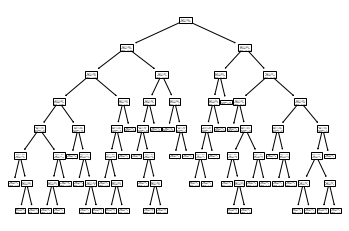

In [51]:
plot_tree(best_dtc)

# Régression logistique 

## Observation

In [52]:
from ipywidgets import interact

def logistic_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(a, x) + b))) 

def loss_logistic(x ,a, b):
    return np.log(np.exp(-(np.dot(a, x) + b))+1)

funcs = {"loss":loss_logistic, "sigmoïde": logistic_sigmoid}
grid_size = 0.1
x_grid = np.arange(-5, 5, grid_size)

plt.clf()

def plot_logistic_sigmoid(f, a, b):
    plt.plot(x_grid, funcs[f](x_grid, a, b), '-b')
    plt.axis([-5, 5, 0, 1])
    plt.show()


interact(
    plot_logistic_sigmoid,
    a=(-10, 10, .25),
    b=(-10, 10),
    f=['sigmoïde', 'loss']
)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='f', options=('sigmoïde', 'loss'), value='sigmoïde'), FloatSlider(v…

<function __main__.plot_logistic_sigmoid(f, a, b)>

## Application

**Question** Importer `LogisticRegression` et entraîner un classifieur. Afficher le score. Adaptez le nombre d'itérations...

In [53]:
from sklearn.linear_model import LogisticRegression

In [315]:
for i in range(1,12+1):
    lr = LogisticRegression(max_iter=i).fit(X_train[attributs_categoriels], y_train)
    print('max_iter =', i, 'score =', lr.score(X_test[attributs_categoriels], y_test))
# au-dessus de max_iter = 12, le score ne change plus

max_iter = 1 score = 0.801980198019802
max_iter = 2 score = 0.7227722772277227
max_iter = 3 score = 0.7326732673267327
max_iter = 4 score = 0.7722772277227723
max_iter = 5 score = 0.7722772277227723
max_iter = 6 score = 0.7920792079207921
max_iter = 7 score = 0.7920792079207921
max_iter = 8 score = 0.7920792079207921
max_iter = 9 score = 0.7722772277227723
max_iter = 10 score = 0.7821782178217822
max_iter = 11 score = 0.7722772277227723
max_iter = 12 score = 0.7821782178217822


**Question** Avec `LogisticRegressionCV` réglez les hyperparamètres. Quelle valeur de $C$ a été trouvée ? 

In [55]:
from sklearn.linear_model import LogisticRegressionCV

In [56]:
lrcv = LogisticRegressionCV(cv=4).fit(X_train[attributs_categoriels], y_train)
lrcv.C_ # se stabilise autour de 0.04641589 dès cv = 4 et max_iter = 5 (leur default values sont respectivement 5 et 100)

array([0.04641589])

## Scaling

Alors que ce n'est pas nécessaire pour les arbres de décision ou NaiveBayes, il pourrait être opportun de normaliser les attributs continus avec d'autres classifieurs...

**Question** Utiliser `StandardScaler` pour normaliser les attributs continus sur le train. Composer alors un nouveau jeu de données `X_train_scaled` avec les attributs continus normalisés et les attributs catégoriels inchangés. On utilisera `fit` pour entrainer la transformation puis `transform` pour l'appliquer au test ensuite... donnant `X_test_scaled`. 

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [342]:
attributs_continus = X_train.columns[X_train.nunique()>5]
attributs_continus

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [343]:
attributs_continus_normalises = scaler.fit_transform(X_train[attributs_continus])
attributs_continus_normalises 

array([[ 0.37102466, -0.62979743,  1.66309315,  0.99003003, -0.93553794],
       [-0.8485268 , -1.09989103, -0.80962942, -0.29051665, -0.84472647],
       [ 0.37102466, -0.98236763,  1.26309391, -0.422987  ,  3.06016663],
       ...,
       [ 1.59057612,  1.72067057, -0.26417592, -0.82039803, -0.84472647],
       [-0.95939512, -0.62979743,  0.00855084, -0.24635987, -0.2090462 ],
       [ 0.92536623,  0.54543657, -0.97326548,  1.2991275 , -0.93553794]])

In [346]:
X_train_scaled = pd.concat([pd.DataFrame(data=attributs_continus_normalises, columns=attributs_continus.tolist()).set_index(X_train.index), X_train[attributs_categoriels]], axis=1) # la ligne de code est assez longue, mais basiquement elle convertit l'array des attributs continus normalisés en dataframe et ré-arrange les indexs du dataframe ainsi construit à la façon de ceux de X_train pour coordonner la concaténation avec les colonnes des attributs catégoriels de X_train
X_train_scaled

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
16,0.371025,-0.629797,1.663093,0.990030,-0.935538,0,2,0,1,0,2,0,2
126,-0.848527,-1.099891,-0.809629,-0.290517,-0.844726,1,0,0,1,0,2,0,2
291,0.371025,-0.982368,1.263094,-0.422987,3.060167,1,0,0,2,0,0,3,1
273,0.371025,-1.805031,-0.264176,0.283522,-0.844726,1,0,0,1,0,2,1,3
67,-1.070263,-0.042180,-0.264176,1.122500,-0.390669,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.515922,0.545437,-0.282358,0.592619,-0.390669,1,2,0,1,0,1,1,3
71,-0.405054,-2.157602,-0.391448,0.195208,-0.935538,1,2,0,1,1,2,1,3
106,1.590576,1.720671,-0.264176,-0.820398,-0.844726,1,3,1,0,0,1,1,2
270,-0.959395,-0.629797,0.008551,-0.246360,-0.209046,1,0,0,0,0,2,0,3


In [357]:
scaler = scaler.fit(X_train_scaled)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
X_test_scaled # on pourrait croire que le dataframe est indentique à X_test mais un rapide coup d'oeil à describe() met en lumière quelques différences

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.000000e+00,-1.143200e-16,150.0,276.0,-1.388357,-0.965169,334.061938,0.890655,0.569895,-0.651512,0.393218,-2.215557
1,59.0,1.000000e+00,3.000000e+00,170.0,288.0,-1.388357,-0.965169,474.409935,-1.003159,-0.279690,-0.651512,-0.694865,1.124313
2,57.0,1.000000e+00,2.000000e+00,150.0,126.0,0.720276,-0.004755,516.215722,-1.003159,-0.279690,0.973246,0.393218,1.124313
3,56.0,9.233538e-17,-1.143200e-16,134.0,409.0,-1.388357,-0.965169,447.534787,0.890655,3.331048,-0.651512,1.481302,1.124313
4,71.0,9.233538e-17,2.000000e+00,110.0,265.0,0.720276,-0.965169,387.812235,-1.003159,-0.704483,0.973246,0.393218,-0.545622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,58.0,9.233538e-17,-1.143200e-16,130.0,197.0,-1.388357,-0.004755,390.798363,-1.003159,0.569895,-0.651512,-0.694865,-0.545622
97,52.0,1.000000e+00,-1.143200e-16,108.0,233.0,0.720276,-0.004755,438.576404,-1.003159,-0.492087,0.973246,2.569385,1.124313
98,44.0,1.000000e+00,1.000000e+00,120.0,220.0,-1.388357,-0.004755,507.257339,-1.003159,-0.704483,0.973246,-0.694865,-0.545622
99,64.0,1.000000e+00,2.000000e+00,125.0,309.0,-1.388357,-0.004755,390.798363,0.890655,3.118652,-0.651512,-0.694865,1.124313


**Question** Réentraîner le classifieur par régression logistique avec ce nouveau jeu de données et estimer les scores.

In [316]:
for i in range(1,21+1):
    lr = LogisticRegression(max_iter=i).fit(X_train_scaled, y_train)
    print('max_iter =', i, 'score =', lr.score(X_test_scaled, y_test))
# au-dessus de max_iter = 21, le score ne change plus

max_iter = 1 score = 0.42574257425742573
max_iter = 2 score = 0.42574257425742573
max_iter = 3 score = 0.42574257425742573
max_iter = 4 score = 0.4158415841584158
max_iter = 5 score = 0.4158415841584158
max_iter = 6 score = 0.42574257425742573
max_iter = 7 score = 0.5742574257425742
max_iter = 8 score = 0.6831683168316832
max_iter = 9 score = 0.6534653465346535
max_iter = 10 score = 0.5841584158415841
max_iter = 11 score = 0.5841584158415841
max_iter = 12 score = 0.594059405940594
max_iter = 13 score = 0.6138613861386139
max_iter = 14 score = 0.6534653465346535
max_iter = 15 score = 0.6435643564356436
max_iter = 16 score = 0.6633663366336634
max_iter = 17 score = 0.6831683168316832
max_iter = 18 score = 0.6435643564356436
max_iter = 19 score = 0.6138613861386139
max_iter = 20 score = 0.6039603960396039
max_iter = 21 score = 0.594059405940594


# SVC...

**Question** Même si cela n'a pas été étudié en cours... on peut aussi utiliser le classifieur `SVC` (voir [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)) 

In [317]:
from sklearn.svm import SVC

In [319]:
svc = SVC().fit(X_train_scaled, y_train)

In [359]:
svc.predict(X_test_scaled) # j'aurai besoin d'infos là, j'imagine que j'ai du me tromper en cours de route

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [362]:
svc.score(X_test_scaled, y_test)

0.4158415841584158